## Análisis de datos del Titanic con Python

### Para ejemplificar el análisis, vamos a utilizar nuestras habituales librerías científicas [NumPy](http://www.numpy.org/), [Pandas](http://pandas.pydata.org/),  [Matplotlib](http://matplotlib.org/) y [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

### El siguiente [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) proporciona información sobre los pasajeros del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic), que se resume de acuerdo con el nivel económico (clase), el sexo, la edad y la supervivencia.

In [1]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

## Importar titanic dataset usando pandas
### El paquete Python pandas (http://pandas.pydata.org/), por ejemplo, proporciona estructuras de datos y herramientas para el análisis de datos. Utilizaremos pandas para importar los datos del Titanic

In [2]:
# importando dataset
titanic = pd.read_csv('titanic.csv')
print(titanic)

      row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st      

### Podemos ver que cada columna csv tiene una característica correspondiente en el DataFrame

In [3]:
print(titanic.head()[['pclass', 'survived', 'age', 'embarked', 'boat', 'sex']])

  pclass  survived      age     embarked   boat     sex
0    1st         1  29.0000  Southampton      2  female
1    1st         0   2.0000  Southampton    NaN  female
2    1st         0  30.0000  Southampton  (135)    male
3    1st         0  25.0000  Southampton    NaN  female
4    1st         1   0.9167  Southampton     11    male


In [4]:
# ver primeros 10 registros
titanic.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


### El problema con [datos](https://es.wikipedia.org/wiki/Dato) como estos, y en general con la mayoría de las *tablas de [datos](https://es.wikipedia.org/wiki/Dato)*, es que nos presentan mucha información y no nos permiten ver que es lo que realmente sucede o sucedió. Por tanto, deberíamos procesarla de alguna manera para hacernos una imagen de lo que los [datos](https://es.wikipedia.org/wiki/Dato) realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar *visualizaciones*. Una buena *visualización de los datos* puede revelar cosas que es probable que no podamos ver en una tabla de números y nos ayudará a pensar con claridad acerca de los patrones y relaciones que pueden estar escondidos en los [datos](https://es.wikipedia.org/wiki/Dato). También nos va a ayudar a encontrar las características y patrones más importantes.

### Tablas de frecuencia

### Para *hacernos una imagen* de los [datos](https://es.wikipedia.org/wiki/Dato), lo primero que tenemos que hacer es agruparlos. Al formar diferentes grupos nos vamos acercando a la comprensión de los [datos](https://es.wikipedia.org/wiki/Dato). La idea es poder ver como se distribuyen los datos a través de las diferentes categorías. Para los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), agrupar es fácil; simplemente debemos contar el número de ítems que corresponden a cada categoría y agruparlos.

### Una forma en la que podemos agrupar nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic) es contando las diferentes *clases* de pasajeros. Podemos organizar estos conteos en una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, que registra los totales y los nombres de las categorías utilizando la función `value_counts` que nos proporciona [Pandas](http://pandas.pydata.org/) del siguiente modo: 

In [5]:
# tabla de frecuencia de clases de pasajeros
pd.value_counts(titanic['pclass'])

3rd    711
1st    322
2nd    280
Name: pclass, dtype: int64

### Contar las cantidad de apariciones de cada categoría puede ser útil, pero a veces puede resultar más útil saber la *fracción o proporción* de los [datos](https://es.wikipedia.org/wiki/Dato) de cada categoría, así que podríamos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categoría. 

### Una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) relativa* muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los casos se distribuyen a través de las categorías. De esta manera, ellas describen la *distribución* de una [variable categórica](https://en.wikipedia.org/wiki/Categorical_variable), ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [6]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['pclass'].value_counts() / len(titanic['pclass'])

3rd    54.150800
1st    24.523991
2nd    21.325209
Name: pclass, dtype: float64

### Visualizaciones de los datos

### Ahora que ya conocemos a las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)* ya estamos en condiciones de crear visualizaciones que realmente nos den una imagen de los datos

#### Gráfico de barras

### El [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros [datos](https://es.wikipedia.org/wiki/Dato). La altura de cada barra muestra el recuento de su categoría. Los barras tienen el  mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. De esta forma, podemos ver fácilmente que había más del doble de pasajeros de tercera clase, que de primera o segunda clase.Veamos como podemos crearlos de forma sencilla utilizando el método `plot` dentro de un `DataFrame` de [Pandas](http://pandas.pydata.org/). 

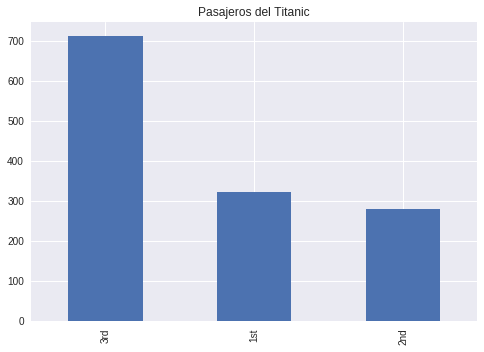

In [7]:
# Gráfico de barras de pasajeros del Titanic
plot = titanic['pclass'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')

### Si quisiéramos enfocarnos en el porcentaje de los pasajeros de cada una de las clases, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gráfico de barras de frecuencias relativas*.

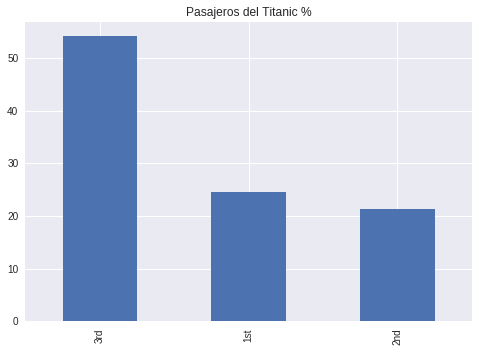

In [8]:
# gráfico de barras de frecuencias relativas con porcentajes
plot = (100 * titanic['pclass'].value_counts() / len(titanic['pclass'])).plot(kind='bar', title='Pasajeros del Titanic %')

#### Gráfico circular

### El [gráfico circular](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) muestra el total de casos como un círculo y luego corta este círculo en piezas cuyos tamaños son proporcionales a la fracción que cada categoría representa sobre el total de casos.Lo podríamos graficar del siguiente modo, también utilizando el método `plot`:

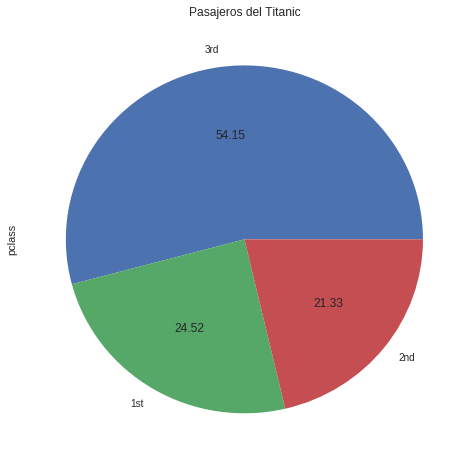

In [9]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['pclass'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8, 8),title='Pasajeros del Titanic')

### Relacionando variables categóricas

### Una de las preguntas que podríamos hacer es ¿existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia? Para poder responder a esta pregunta, vamos a necesitar analizar a las variables *pclass* y *survived* de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) en forma conjunta. Una buena forma de analizar dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable) en forma conjunta, es agrupar los recuentos en una tabla de *doble entrada*; este tipo de tablas se conocen en [estadística](http://relopezbriega.github.io/tag/estadistica.html) con el nombre de [tabla de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia). Veamos como podemos crear esta tabla utilizando la función `crosstab` de [Pandas](http://pandas.pydata.org/). 

In [10]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],columns=titanic['pclass'], margins=True)

pclass,1st,2nd,3rd,All
survived,,,,
0,129,161,574,864
1,193,119,137,449
All,322,280,711,1313


### Los márgenes de la tabla, tanto en la derecha y como en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la clase de pasajeros. La columna derecha de la tabla es la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la variable supervivencia. 

### Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable), en este caso *pclass* y *survived*.

### Al igual de como habíamos visto con las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, también nos podría ser útil representar a las [tablas de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia) con porcentajes relativos; esto lo podríamos realizar utilizando el método `apply` del siguiente modo:

In [11]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['pclass'],margins=True).apply(lambda r: r/len(titanic) *100,axis=1)

pclass,1st,2nd,3rd,All
survived,,,,
0,9.824829,12.261995,43.716679,65.803503
1,14.699162,9.063214,10.434120,34.196497
All,24.523991,21.325209,54.150800,100.000000


### Con esta tabla podemos ver fácilmente que solo el 34.19% de los pasajeros sobrevivió y que este 34% se compone de la siguiente forma: del total de pasajeros sobrevivió un 14.69% de pasajeros que eran de primera clase, un 9% que eran de segunda clase y un 10.43% que eran pasajeros de tercera clase.

### Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir según la clase de pasajero, podría ser más útil construir la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

### Aquí podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 42.98% correspondían a primera clase, el 26.50% a segunda clase y el 30.51% a tercera clase. Por tanto podríamos concluir que los pasajeros de primera clase tenían más posibilidades de sobrevivir. 

### Como dato curioso podemos destacar hubo un porcentaje mayor que se salvó que eran de tercera clase 

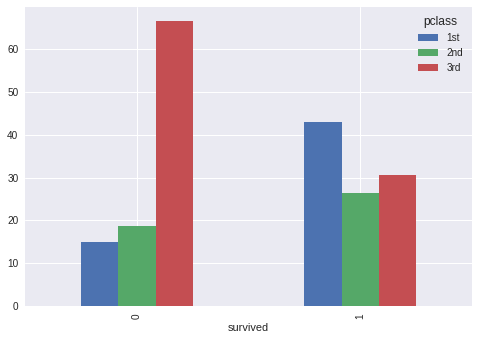

In [12]:
# # Gráfico de barras de sobrevivivientes segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['pclass']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

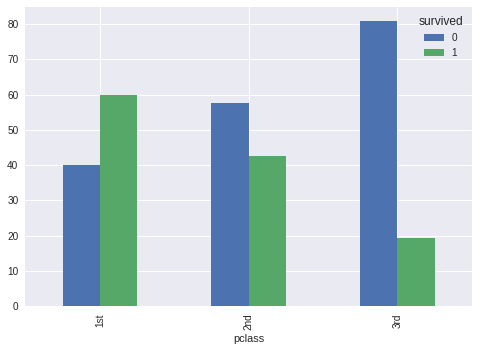

In [13]:
# Gráfico de barras de sobrevivivientes segun clase
plot = pd.crosstab(index=titanic['pclass'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

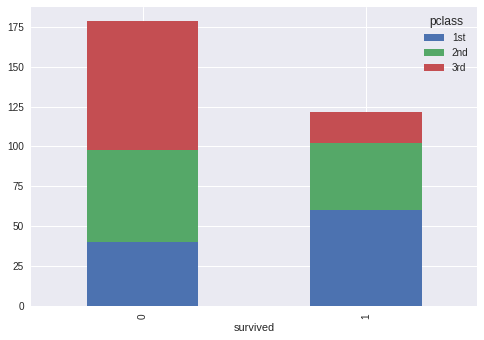

In [14]:
# Gráfico de barras de sobrevivivientes segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['pclass']).apply(lambda r: r/r.sum() *100,axis=0).plot(kind='bar', stacked=True)